# IBM Data Science Capstone Project - The best place to open a new pub

Github has problems displaying the folium maps correctly. Therefore, you can look at the notebook via this link:

https://nbviewer.jupyter.org/github/petrKantek/Coursera_Capstone/blob/main/Torronto.ipynb

## 1. Introduction
Everyone loves beer, there is not question about that. But due to the current pandemic situation, many pubs are endangered by the governmental restrictions. Limitations of pubs include: lowered capacity due to safety distance measures, reduced openning time, or in extreme cases closure. We can expect that many pubs will go bancrupt and will never reopen. This, on the other hand, provides an oppurtunity for brave entrepreneurs, who could open a new pub after the pandemic will have been vanished from the world, and thus fill the empty space in the pub and beer industry. We are here to help the potential pub-owners to choose the best location for their new pub! Since we already have some background knowledge of the Toronto area, we will focus on this location.

## 2. Data
We will use 2 data sources: Toronto neighbourhoods dataset and Foursquare API. Lets begin.

In [69]:
import pandas as pd
import numpy as np
import requests
%matplotlib inline

Lets load the dataset with neighbourhoods and their related information from a wikipedia site

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

df_hoods = pd.read_html( url )[0]
df_hoods

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


We can see there are boroughs and neighbourhoods that have 'Not assigned' values. We will get rid of them.

In [4]:
df_hoods = df_hoods[ df_hoods[ 'Borough' ] != "Not assigned" ]
df_hoods

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Lets check we did it correctly and there are no 'Not assigned' values left both in Borough and Neighbourhood columns.

In [5]:
print( df_hoods[ df_hoods['Borough'] == "Not assigned" ].shape[0],
       df_hoods[ df_hoods['Neighbourhood'] == "Not assigned" ].shape[0]) 

0 0


Lastly, lets check the shape of the prepocessed dataset

In [5]:
df_hoods.shape

(103, 3)

In [54]:
df_grouped = df_hoods.groupby(['Borough', 'Postal Code'], as_index=False).agg(lambda x:','.join(x))
df_grouped

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
...,...,...,...
98,York,M6C,Humewood-Cedarvale
99,York,M6E,Caledonia-Fairbanks
100,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
101,York,M6N,"Runnymede, The Junction North"


In [53]:
grouped_boroughs = pd.DataFrame( df_hoods.groupby('Borough').count()['Neighbourhood'] )
grouped_boroughs

,Neighbourhood
Borough,
Central Toronto,9
Downtown Toronto,19
East Toronto,5
East York,5
Etobicoke,12
Mississauga,1
North York,24
Scarborough,17
West Toronto,6


In [20]:
import seaborn as sns
sns.set()
%matplotlib inline

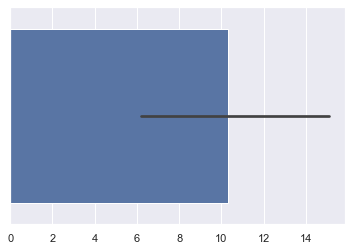

In [33]:
sns.barplot( grouped_boroughs )

In [39]:
grouped_boroughs["Neighbourhood"]

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

### Loading the geocoordinates

Since the API calls to get the geocoordinates are horribly slow and unstable, it is more efficient to load a csv file of already prepared data

In [45]:
geocoords = pd.read_csv( "data/Geospatial_Coordinates.csv" )
geocoords

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


We can now merge the geocoordinates with the neighbourhood dataset on the *Postal Code* column.

In [56]:
complete_data = pd.merge( df_grouped, geocoords, on = "Postal Code")
complete_data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [57]:
df_toronto = complete_data
df_toronto.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [61]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.704607733980595, -79.3971529116505


### Loading Venue Data

In [62]:
CLIENT_ID = 'QZ4UPMNUKWW4WQHIARR1ZTA0AV15MPUQO5T3E2U3BW3XB10P' # your Foursquare ID
CLIENT_SECRET = 'JCWGSYS1GFLMQO4BTSUFG21ARQ2FPDX4JOMYMV1WMVIWLI5H' # your Foursquare Secret
VERSION = 20201013 # Foursquare API version

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list = []
    for name, lat, lng in zip( names, latitudes, longitudes ):
        print( name )
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
toronto_venues = getNearbyVenues(names = df_toronto['Neighbourhood'],
                                latitudes = df_toronto['Latitude'],
                                longitudes = df_toronto['Longitude'])

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [72]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


In [74]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,7,7,7,7,7,7


In [75]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 272 uniques categories.


In [76]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Park' 'Swim School' 'Bus Line' 'Breakfast Spot' 'Food & Drink Shop'
 'Department Store' 'Hotel' 'Sandwich Place' 'Gym / Fitness Center'
 'Dog Run' 'Dance Studio' 'Yoga Studio' 'Salon / Barbershop' 'Diner'
 'Coffee Shop' 'Restaurant' 'Spa' 'Chinese Restaurant'
 'Mexican Restaurant' 'Clothing Store' 'Fast Food Restaurant'
 'Sporting Goods Shop' 'Café' 'Ice Cream Shop' 'Furniture / Home Store'
 'Bagel Shop' 'Dessert Shop' 'Indian Restaurant' 'Italian Restaurant'
 'Pizza Place' 'Seafood Restaurant' 'Sushi Restaurant' 'Gym'
 'Thai Restaurant' 'Toy / Game Store' 'Brewery' 'Greek Restaurant'
 'Gas Station' 'Farmers Market' 'Gourmet Shop' 'Pharmacy'
 'Indoor Play Area' 'Trail' 'Playground' 'Liquor Store' 'Supermarket'
 'American Restaurant' 'Pub' 'Vietnamese Restaurant' 'Fried Chicken Joint'
 'Bank' 'Light Rail Station' 'Garden' 'Music Venue' 'Jewelry Store'
 'Donut Shop' 'Burger Joint' 'BBQ Joint' 'Middle Eastern Restaurant'
 'History Museum' 'Japanese Restaurant' '

In [137]:
"Pub" in toronto_venues['Venue Category'].unique()


True

### Analyze each neighbourhood

In [84]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2135, 273)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 273)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
ita = to_grouped[["Neighbourhoods","Pub"]]
ita.head() #.head() shows the first five rows only

,Neighbourhoods,Pub
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.142857
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.045455


In [89]:
ita = ita.rename(columns={'Neighbourhoods':'Neighbourhood'})

## 3. Methodology

In [90]:
from sklearn.cluster import KMeans

In [91]:
X = ita.drop(["Neighbourhood"], axis = 1)
X

,Pub
0,0.000000
1,0.142857
2,0.000000
3,0.000000
4,0.045455
...,...
91,0.000000
92,0.000000
93,0.000000
94,0.000000


In [92]:
kmeans = KMeans(n_clusters = 4, random_state = 42 ).fit( X )
kmeans.labels_


array([0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

We will use the K-means algorithm to cluster the neighbourhoods.

In [94]:
to_merged = ita.copy()

to_merged["Cluster Labels"] = kmeans.labels_

In [96]:
to_merged.head()

,Neighbourhood,Pub,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.142857,3
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.045455,2


In [97]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighbourhood"), on="Neighbourhood")

print(to_merged.shape)
to_merged.head()

(2135, 9)


,Neighbourhood,Pub,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,0,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,0,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,0,43.7942,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
0,Agincourt,0.0,0,43.7942,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink


In [101]:
to_merged['Venue Category'].value_counts()["Pub"]

26

In [110]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [112]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)
kclusters = 4
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighbourhood Latitude'], to_merged['Neighbourhood Longitude'], to_merged['Neighbourhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### Lets analyze the resulting clusters

In [115]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

,Neighbourhood,Pub,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.142857,3
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.045455,2


In [117]:
import matplotlib.pyplot as plt

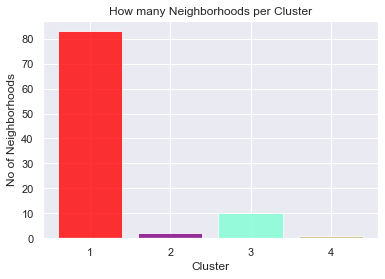

In [118]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [121]:
# How many neighborhoods in each cluster
ita['Cluster Labels'].value_counts()

0    83
2    10
1     2
3     1
Name: Cluster Labels, dtype: int64

In [127]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df_toronto[['Borough', 'Neighbourhood']]
df_new.head()

,Borough,Neighbourhood
0,Central Toronto,Lawrence Park
1,Central Toronto,Davisville North
2,Central Toronto,"North Toronto West, Lawrence Park"
3,Central Toronto,Davisville
4,Central Toronto,"Moore Park, Summerhill East"


In [128]:
# Red 

cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighbourhood')
df_cluster1

,Borough,Neighbourhood,Pub,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Central Toronto,Davisville North,0.0,0,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
4,Central Toronto,Davisville North,0.0,0,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
...,...,...,...,...,...,...,...,...,...,...
1782,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,195 Jane Rocket,43.672335,-79.492634,Bus Line
1783,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,High Park Brewery,43.669903,-79.483430,Brewery
1784,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,Starving Artist,43.669860,-79.483110,Breakfast Spot
1785,York,Weston,0.0,0,43.706876,-79.518188,Grattan Park,43.706222,-79.521705,Park


In [130]:
# Purple 
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighbourhood')
df_cluster2.sort_values(["Pub"], ascending=False)
df_cluster2['Venue Category'].value_counts(ascending=False)['Pub']

2

In [131]:
# Blue
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighbourhood')
df_cluster3

,Borough,Neighbourhood,Pub,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.071429,2,43.686412,-79.400049,LCBO,43.686991,-79.399238,Liquor Store
1,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.071429,2,43.686412,-79.400049,The Market By Longo’s,43.686711,-79.399536,Supermarket
2,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.071429,2,43.686412,-79.400049,Union Social Eatery,43.687895,-79.394916,American Restaurant
3,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.071429,2,43.686412,-79.400049,Daeco Sushi,43.687838,-79.395652,Sushi Restaurant
4,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.071429,2,43.686412,-79.400049,Mary Be Kitchen,43.687708,-79.395062,Restaurant
...,...,...,...,...,...,...,...,...,...,...
399,West Toronto,"Runnymede, Swansea",0.060606,2,43.651571,-79.484450,West End Mamas,43.648703,-79.484919,Health Food Store
400,West Toronto,"Runnymede, Swansea",0.060606,2,43.651571,-79.484450,(The New) Moksha Yoga Bloor West,43.648658,-79.485242,Yoga Studio
401,West Toronto,"Runnymede, Swansea",0.060606,2,43.651571,-79.484450,My Place - a Canadian Pub,43.648458,-79.485187,Pub
402,West Toronto,"Runnymede, Swansea",0.060606,2,43.651571,-79.484450,The Coffee Bouquets,43.648785,-79.485940,Coffee Shop


In [132]:
# Turquoise
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighbourhood')
df_cluster4

,Borough,Neighbourhood,Pub,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place
1,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Timothy's Pub,43.600165,-79.544699,Pub
2,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Toronto Gymnastics International,43.599832,-79.542924,Gym
3,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Tim Hortons,43.602396,-79.545048,Coffee Shop
4,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Pizza Pizza,43.605340,-79.547252,Pizza Place
5,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Subway,43.599152,-79.544395,Sandwich Place
6,Etobicoke,"Alderwood, Long Branch",0.142857,3,43.602414,-79.543484,Rexall,43.601951,-79.545694,Pharmacy


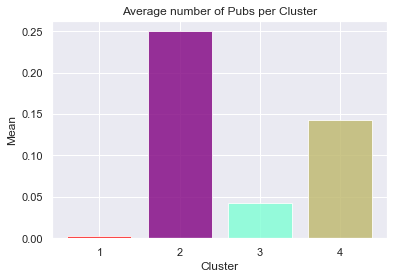

In [133]:
clusters_mean = [df_cluster1['Pub'].mean(),df_cluster2['Pub'].mean(),df_cluster3['Pub'].mean(),
                 df_cluster4['Pub'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Pubs per Cluster')

plt.show()

The resulting labels are the following.

We cab add them to the neighbourhood dataset, so we can nicely plot them on a map inside their clusters.

For plotting the clusters on a map, we will use the Folium library.

## 4. Results

## 5. Discussion

## 6. Conclusion